In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

In [10]:
from google.colab import files

In [5]:
uploaded=files.upload()

Saving Copy of Unemployment_Rate_upto_11_2020.csv to Copy of Unemployment_Rate_upto_11_2020.csv


In [46]:
import datetime as dt

import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [101]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [102]:
! pip install plotly.express

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl


In [103]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [104]:
df=pd.read_csv('Copy of Unemployment_Rate_upto_11_2020.csv')

# Data Import

In [105]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [107]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

In [108]:
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [110]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [111]:
df['Frequency']= df['Frequency'].astype('category')

In [112]:
df['Month'] =  df['Date'].dt.month



In [113]:
df['Month_int'] = df['Month'].apply(lambda x : int(x))

In [114]:

df['Month_name'] =  df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [115]:
df['Region'] = df['Region'].astype('category')

In [116]:
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


# Stats

In [117]:
 df_stats = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate']]


round(df_stats.describe().T,2 )

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [118]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()

region_stats = round(region_stats,2)


region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


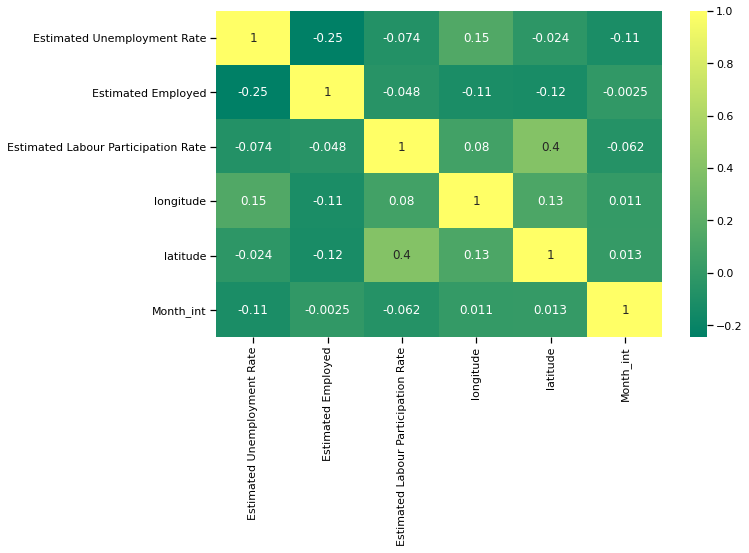

In [119]:
heat_maps = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate',
       'longitude', 'latitude', 'Month_int']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

# Data exploratory Analysis

In [120]:
fig = px.box(df,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# The below box shows unemployement rate in each state in India

In [121]:
fig = px.scatter_matrix(df,template='plotly',
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

In [122]:
plot_ump = df[['Estimated Unemployment Rate','States']]

df_unemp = plot_ump.groupby('States').mean().reset_index()

df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [123]:
fig = px.bar(df, x='Region',y='Estimated Unemployment Rate',animation_frame = 'Month_name',color='States',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

In [124]:
unemplo_df = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]

unemplo = unemplo_df.groupby(['Region','States'])['Estimated Unemployment Rate'].mean().reset_index()


In [125]:
fig = px.sunburst(unemplo, path=['Region','States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma',title= 'unemployment rate in each region and state',
                  height=650,template='ggplot2')


fig.show()

TypeError: ignored


# Impact of Lockdown on States Estimated Employed


* On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days



In [87]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [88]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]

bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]


In [89]:
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()


g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']

g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

g_lock.head(2)

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250


In [90]:
# percentage change in unemployment rate
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)

In [91]:
plot_per = g_lock.sort_values('percentage change in unemployment')

In [92]:
# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')

fig.show()


# most impacted states/UT

* Puducherry
* Jharkhand
* Bihar
* Haryana
* Tripura


In [93]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x    


In [94]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))



In [95]:
fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)


fig.show()